# ECM3420 Coursework

## Data cleaning and exploration

Import all the required libraries and set sttings as desired.

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import colorcet as cc
from IPython.display import Markdown as md


sns.set(rc={'figure.figsize':(16,10)})

palette = sns.color_palette(cc.glasbey, n_colors=25)

Read the dataset csv file into a pandas dataset and print it.

In [2]:
df = pd.read_csv('fortune500.csv')

print(df)

     rank               title                           website  employees  \
0       1             Walmart            http://www.walmart.com    2300000   
1       2  Berkshire Hathaway  http://www.berkshirehathaway.com     367700   
2       3               Apple              http://www.apple.com     116000   
3       4         Exxon Mobil         http://www.exxonmobil.com      72700   
4       5            McKesson           http://www.mckesson.com      68000   
..    ...                 ...                               ...        ...   
495   496       Michaels Cos.           http://www.michaels.com      31000   
496   497       Toll Brothers       http://www.tollbrothers.com       4200   
497   498               Yahoo              http://www.yahoo.com       8500   
498   499       Vistra Energy       http://www.vistraenergy.com       4431   
499   500      ABM Industries                http://www.abm.com     110000   

                         sector                                

Check for duplicates

In [3]:
df.duplicated().sum()

0

It could easily be seen that many of the columns in this dataset would not be used for any anylsis of the data so I removed the following columns from the pandas dataframe using pandas.DataFrame.drop:

-  website
-  hqlocation
-  hqaddr
-  hqzip
-  hqtel
-  ceo
-  ceo_title
-  fullname

This reduces the dataframe to 500 x 15.

In [4]:
df.drop(columns=['website','hqlocation','hqaddr','hqzip','hqtel','ceo','ceo_title','fullname'], inplace=True)
print(df)

     rank               title  employees                      sector  \
0       1             Walmart    2300000                   Retailing   
1       2  Berkshire Hathaway     367700                  Financials   
2       3               Apple     116000                  Technology   
3       4         Exxon Mobil      72700                      Energy   
4       5            McKesson      68000                 Wholesalers   
..    ...                 ...        ...                         ...   
495   496       Michaels Cos.      31000                   Retailing   
496   497       Toll Brothers       4200  Engineering & Construction   
497   498               Yahoo       8500                  Technology   
498   499       Vistra Energy       4431                      Energy   
499   500      ABM Industries     110000           Business Services   

                                     industry         hqcity hqstate  \
0                       General Merchandisers    Bentonville   

Create a histogram of the revenue data with bars split by sector the company is involved with.

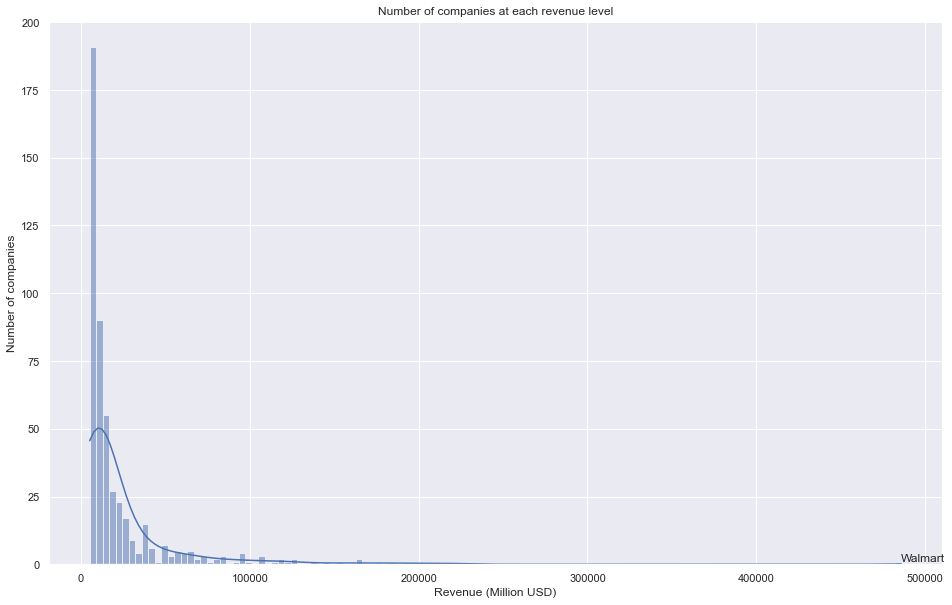

In [5]:
sns.histplot(data=df, x="revenues", palette='bright', kde=True)
plt.title('Number of companies at each revenue level')
plt.xlabel('Revenue (Million USD)')
plt.ylabel('Number of companies')
plt.text(x=df.revenues[df.revenues==df.revenues.max()], y=1, s='Walmart')
plt.show()

In the previous graph it could be seen that one data point had a far higher revenue than any other in the dataset, this datapoint is the 1st ranked company; Walmart who had a yearly revenue of 485,873 Million USD, compared to 2nd place; Berkshire Hathaway at 223,604 Million USD, a difference of 117.3% to 4 significant figures.
In order to get a closer view of the rest of the data I created a new variable 'walmart_removed_df' and assigned it the value of the original dataframe with the first row removed using the pandas.DataFrame.drop function.
I then plotted the graph as before.

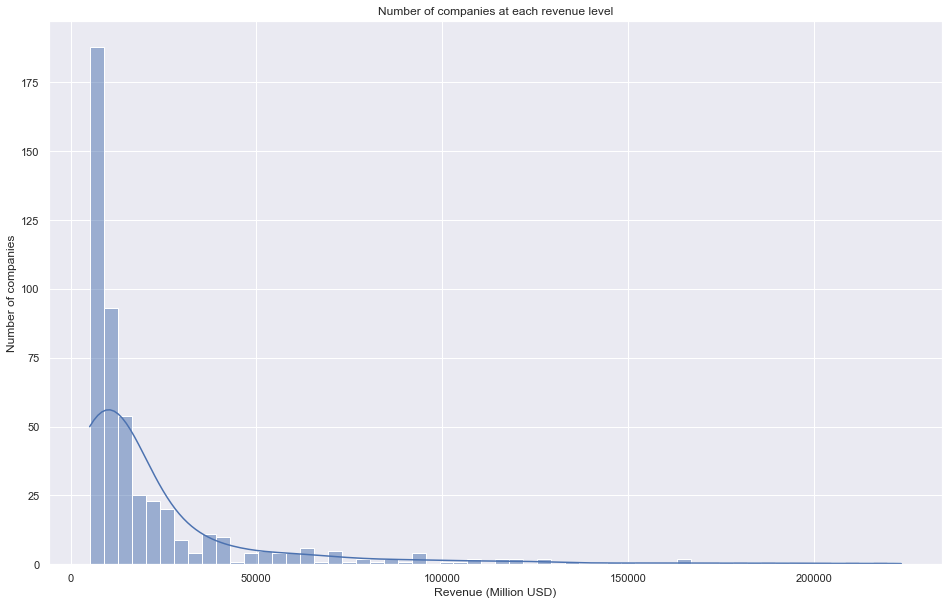

In [6]:
walmart_removed_df = df.drop(0)

sns.histplot(data=walmart_removed_df, x="revenues", palette='bright', kde=True, stat='count')
plt.title('Number of companies at each revenue level')
plt.xlabel('Revenue (Million USD)')
plt.ylabel('Number of companies')
plt.show()

I used a seaborn countplot to plot the number of occurences of each industry sector in the dataset

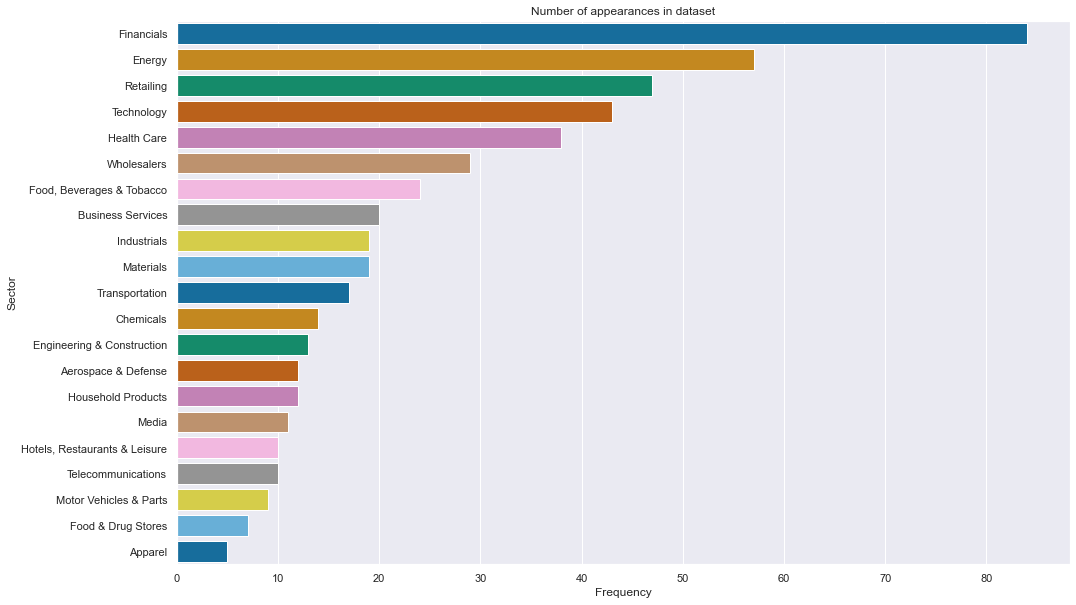

In [7]:
sns.countplot(data=df, y='sector', order=df.sector.value_counts().index, palette='colorblind')
plt.title('Number of appearances in dataset')
plt.xlabel('Frequency')
plt.ylabel('Sector')
plt.show()


And a pie chart to show the same data as a percentage.

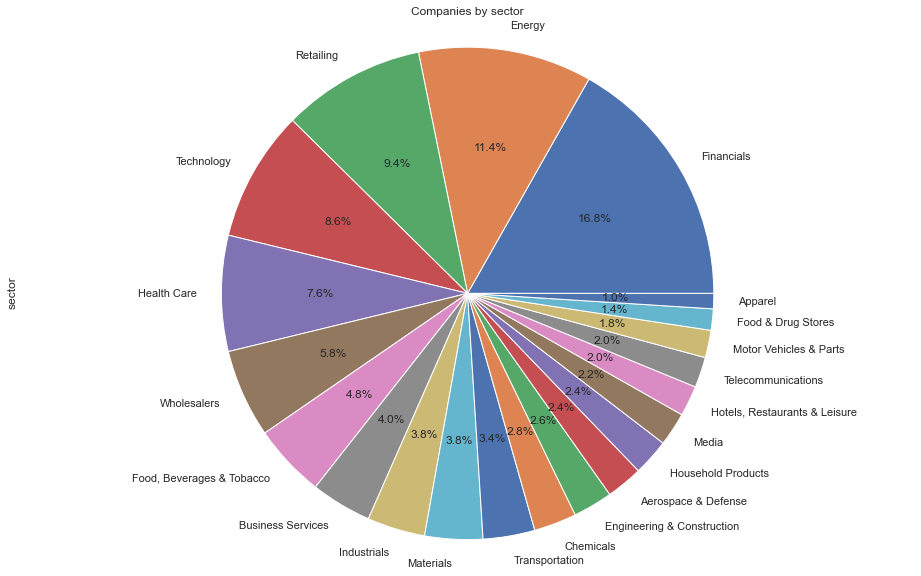

In [8]:
df.sector.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.axis('equal')
plt.title("Companies by sector")
plt.show()

I then used a seaborn barplot to display the total revenue for each sector, ordering it by the frequency in which the sector occurs in the dataset.

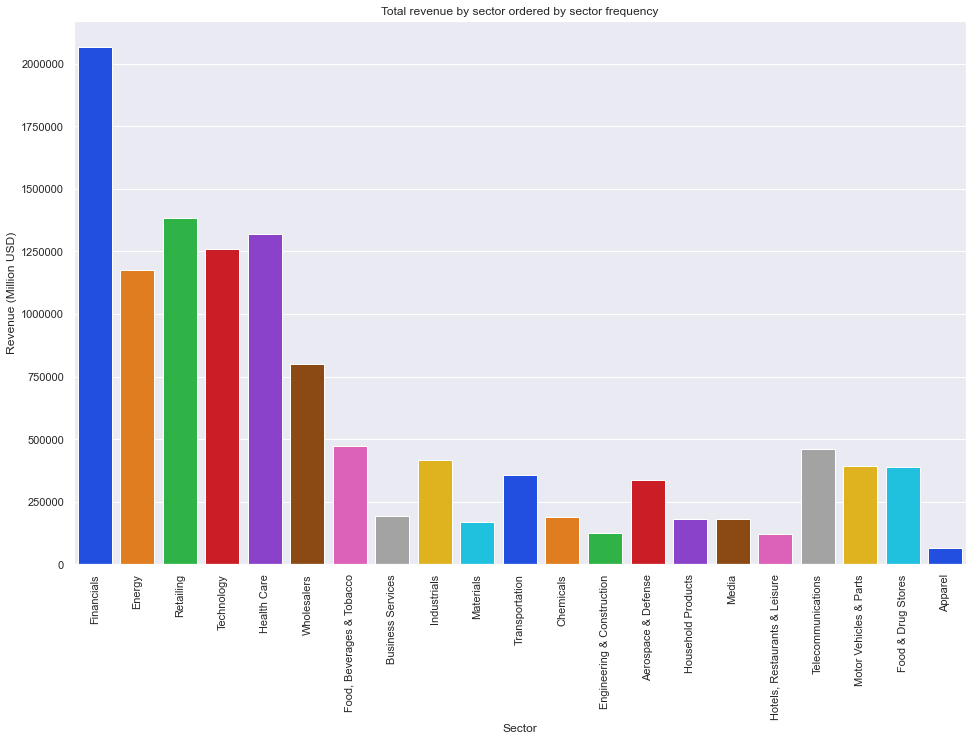

In [9]:
sns.barplot(x="sector", y="revenues", data=df, estimator=sum, palette='bright', ci=None,
           order=df.sector.value_counts().index)
plt.xticks(rotation=90)
plt.title("Total revenue by sector ordered by sector frequency")
plt.xlabel("Sector")
plt.ylabel("Revenue (Million USD)")
plt.ticklabel_format(style='plain', axis='y') # Use normal notation instead of scientific
plt.show()

And then the same as above but instead of the total revenue it is the mean revenue for each sector still in the saem oder as before.

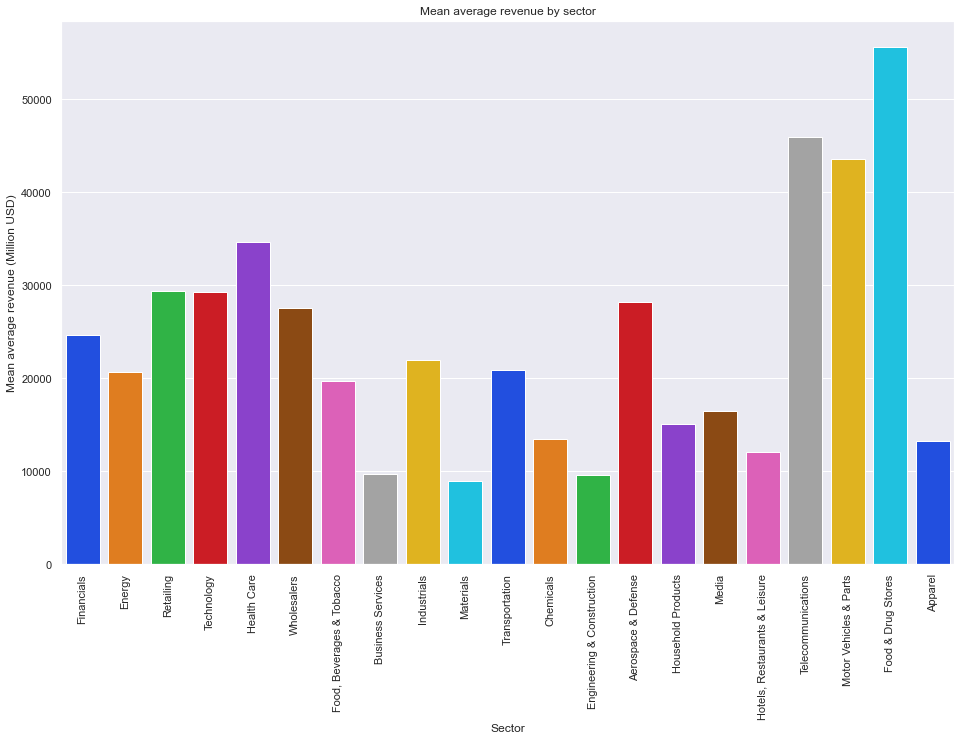

In [10]:
sns.barplot(x="sector", y="revenues", data=df, estimator=np.mean, palette='bright', ci=None,
           order=df.sector.value_counts().index)
plt.xticks(rotation=90)
plt.title("Mean average revenue by sector")
plt.xlabel("Sector")
plt.ylabel("Mean average revenue (Million USD)")
plt.show()

I used another seaborn countplot to count the number of companies with headquarters in each state.

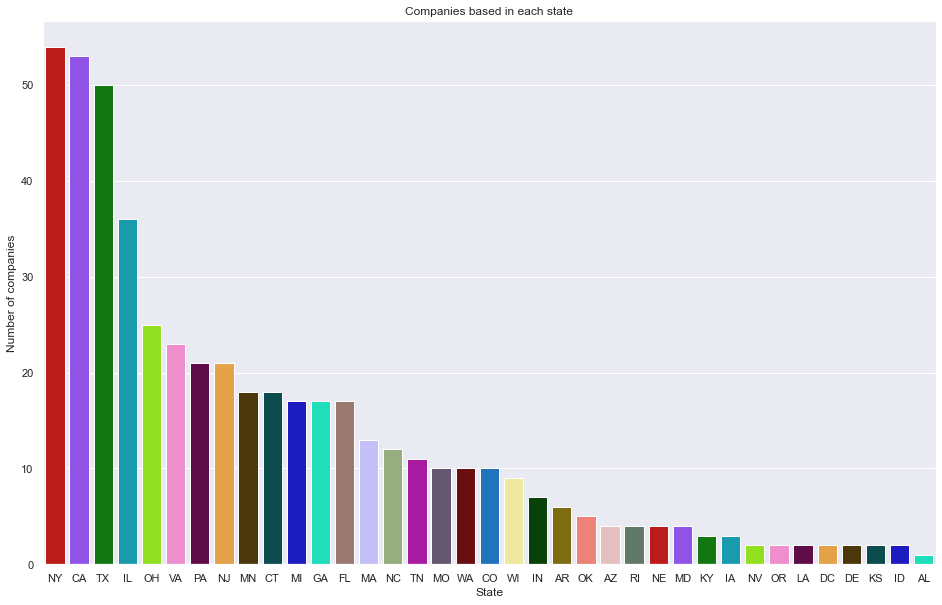

In [11]:
sns.countplot(data=df, x='hqstate', order=df.hqstate.value_counts().index, palette=palette, dodge=False)
plt.title("Companies based in each state")
plt.xlabel("State")
plt.ylabel("Number of companies")
plt.show()

Using a seaborn scatterplot to graph the company revenue compared to the number of employees. The employee numbers of Walmart compared to the company that employees the 2nd most people is huge; 2,300,000 compared to Kroger with 443,000. This difference is so huge it dramatically reduces the usefulness of the graph so another one is made using the datafram with walmart removed that was prepared earlier.

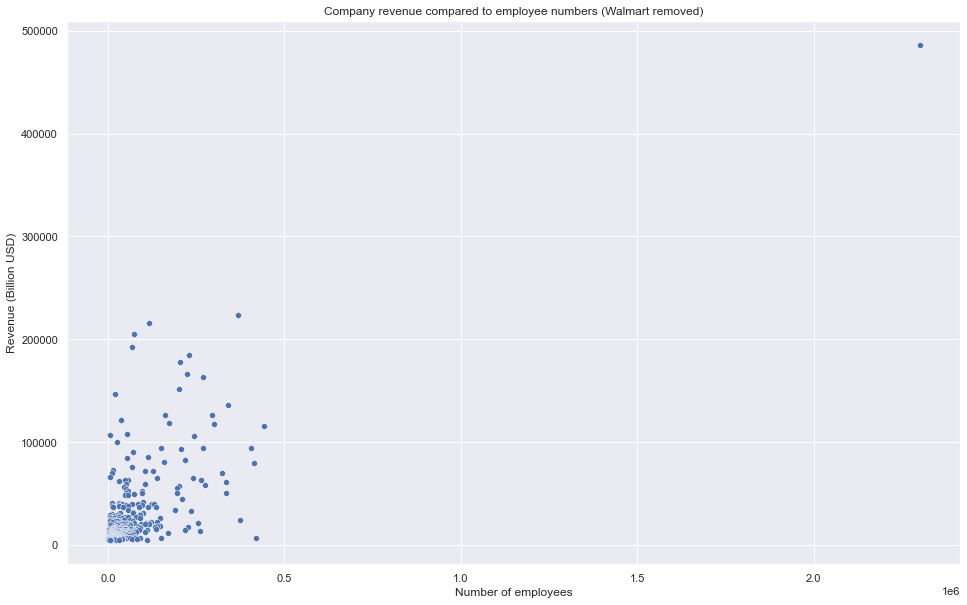

In [12]:
sns.scatterplot(data=df, x='employees', y='revenues', palette='bright')
plt.title("Company revenue compared to employee numbers (Walmart removed)")
plt.xlabel("Number of employees")
plt.ylabel("Revenue (Billion USD)")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

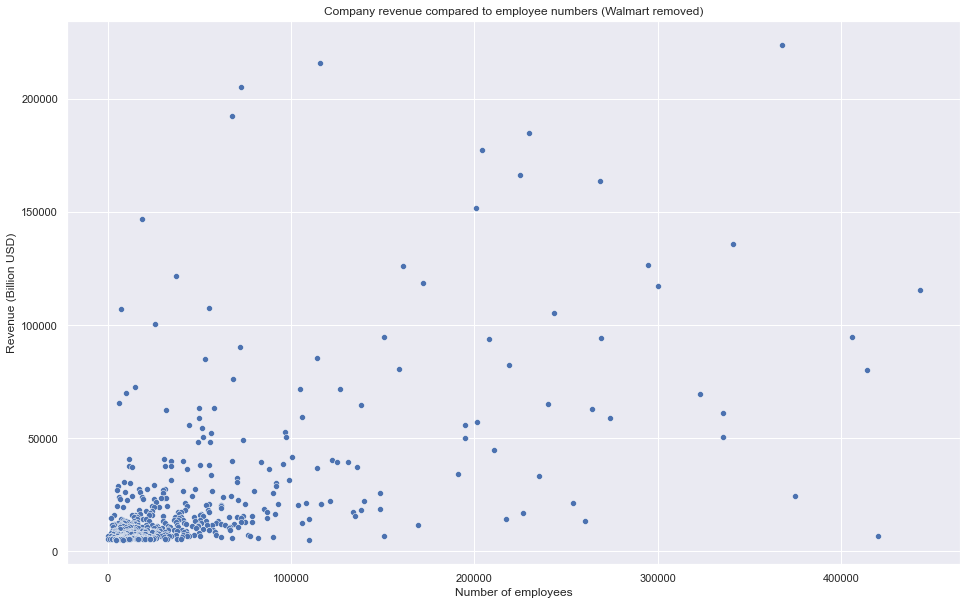

In [13]:
sns.scatterplot(data=walmart_removed_df, x='employees', y='revenues', palette='bright')
plt.title("Company revenue compared to employee numbers (Walmart removed)")
plt.xlabel("Number of employees")
plt.ylabel("Revenue (Billion USD)")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [14]:
df.sort_values('employees', ascending=False)

,rank,title,employees,sector,industry,hqcity,hqstate,address,ticker,revenues,revchange,profits,prftchange,assets,totshequity
0,1,Walmart,2300000,Retailing,General Merchandisers,Bentonville,AR,"702 S.W. Eighth St., Bentonville, AR 72716",WMT,485873,0.8,13643.0,-7.2,198825,77798.0
17,18,Kroger,443000,Food & Drug Stores,Food and Drug Stores,Cincinnati,OH,"1014 Vine St., Cincinnati, OH 45202",KR,115337,5.0,1975.0,-3.1,36505,6698.0
398,399,Yum China Holdings,420000,"Hotels, Restaurants & Leisure",Food Services,Plano,TX,"7100 Corporate Dr., Plano, TX 75024",YUMC,6752,4.0,502.0,-13.4,3727,2377.0
31,32,IBM,414400,Technology,Information Technology Services,Armonk,NY,"1 New Orchard Rd., Armonk, NY 10504",IBM,79919,-3.1,11872.0,-10.0,117470,18246.0
22,23,Home Depot,406000,Retailing,Specialty Retailers: Other,Atlanta,GA,"2455 Paces Ferry Rd., Atlanta, GA 30339",HD,94595,6.9,7957.0,13.5,42966,4333.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,334,Global Partners,1770,Wholesalers,Wholesalers: Diversified,Waltham,MA,"800 South St., Waltham, MA 02453",GLP,8240,-20.1,-199.4,-557.8,2564,393.0
188,189,INTL FCStone,1464,Financials,Diversified Financials,New York,NY,"708 Third Ave., New York, NY 10017",INTL,14755,-57.5,54.7,-1.8,5951,434.0
479,480,Delek US Holdings,1326,Energy,Petroleum Refining,Brentwood,TN,"7102 Commerce Way, Brentwood, TN 37027",DK,5414,-6.0,-153.7,-892.3,2985,992.0
471,472,Host Hotels & Resorts,220,Financials,Real Estate,Bethesda,MD,"6903 Rockledge Dr., Bethesda, MD 20817",HST,5488,1.9,762.0,36.6,11408,6994.0


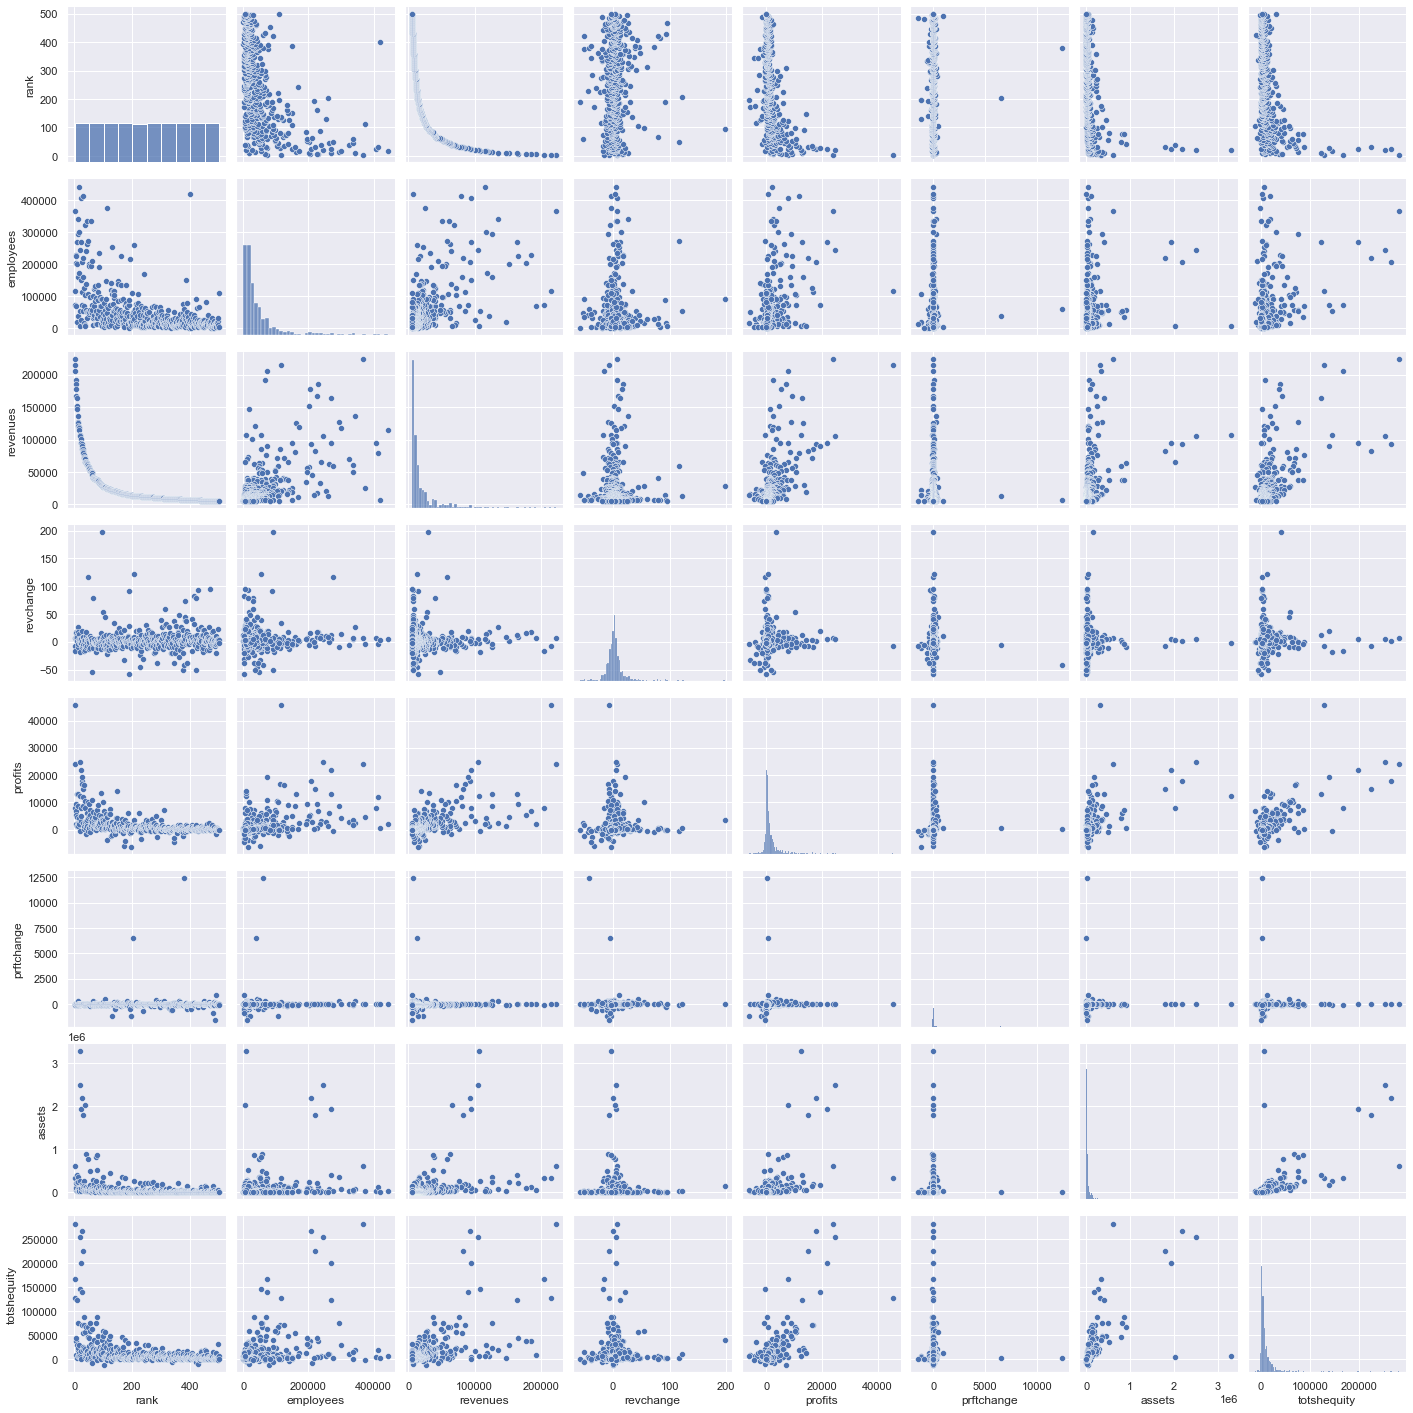

In [15]:
#sns.pairplot(df)
sns.pairplot(walmart_removed_df, diag_kind='hist')
plt.show()

## Machine learning methods

I chose to perform regression on this dataset to use as prediction, so I selected the variables I was going to use as 'x' and the variable I was going to try and predict as 'y'. I chose profits as y and for 'x' I chose to use employees, revenues, assets and totshequity as from the heatmap I could see that these were the 4 factors that had the largest impact on profits.

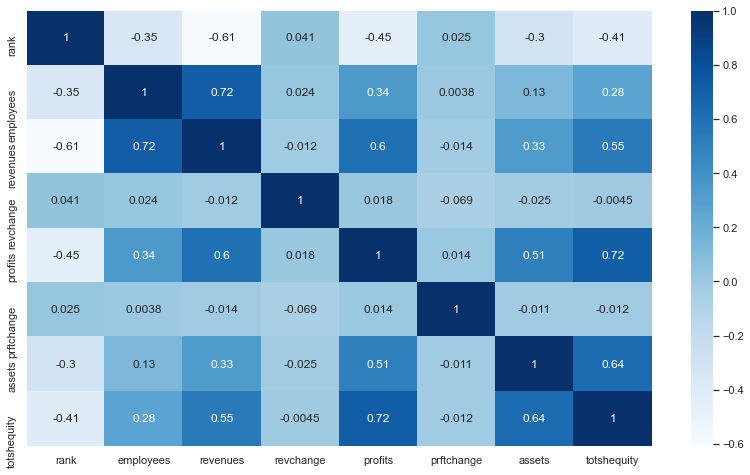

     employees  revenues  assets  totshequity  revchange  prftchange
0      2300000    485873  198825      77798.0        0.8        -7.2
1       367700    223604  620854     283001.0        6.1         0.0
2       116000    215639  321686     128249.0       -7.7       -14.4
3        72700    205004  330314     167325.0      -16.7       -51.5
4        68000    192487   56563       8924.0        6.2        53.0
..         ...       ...     ...          ...        ...         ...
495      31000      5197    2148      -1698.0        5.8         4.2
496       4200      5170    9737       4229.0       23.9         5.2
497       8500      5169   48083      31049.0        4.0         5.2
498       4431      5164   15167       6597.0        4.0         5.2
499     110000      5145    2281        974.0       -2.8       -25.0

[500 rows x 6 columns]
########################################################
0      13643.0
1      24074.0
2      45687.0
3       7840.0
4       2258.0
        ...   
4

In [241]:
plt.figure(figsize=(14,8))
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues")
plt.show()

x = df[['employees', 'revenues', 'assets', 'totshequity', 'revchange', 'prftchange']]
y = df['profits']

print(x)
print('########################################################')
print(y)

### Multiple linear regression

Regression models describe the relationship between variables, linear regression models use a straight line. Multiple linear regression attempts to model the relationship between two or more explanatory variables and a response variable by fitting a linear equation to observed data. The dependent variable must be a continuous vlaue, e.g. profits in this case. The independent variables may be either continuous or binary, in this case all are continuous.

Singular linear regression can also be easily plotted using the seaborn regplot function which plots the data given to it along with a linear regression fit. Plotting profits against the single factor that has the highest impact, which from the heatmap we can see is totshequity, we get the following graph showing the relationship between the 2 fetaures and a fit line that can be used to read predictions from the graph.

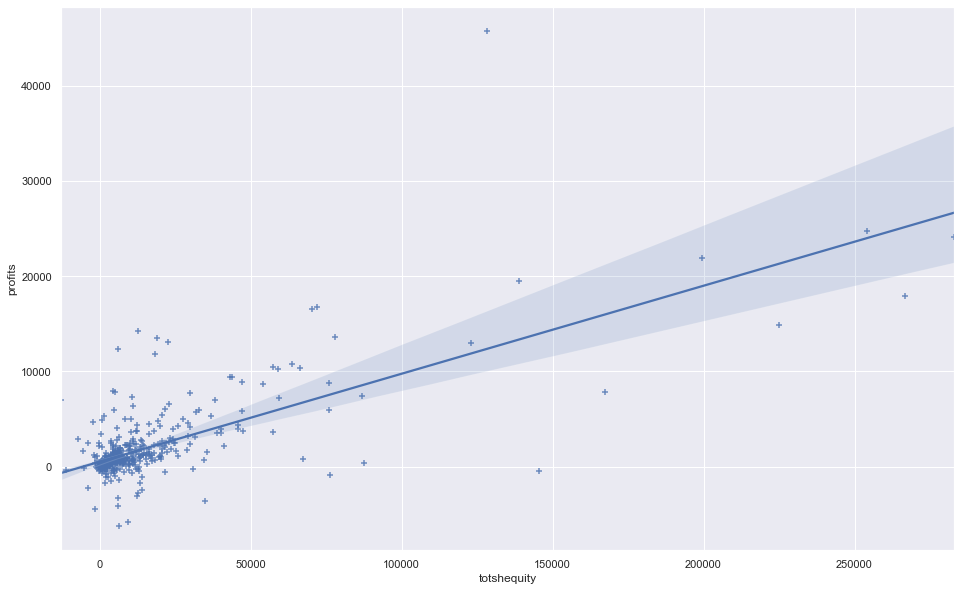

In [263]:
sns.regplot(y=df.profits, x=df.totshequity, marker="+")
plt.show()

Multiple linear regression requires more work which is done as follows. Split the data into training and test data using scikit-learn allowing control over the size of the test data. I chose to use a split with the test data being 30% of the dataset and the other 70% used for training.

In [264]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

print(x_train)
print('350 rows')
print('##########################################################')
print(x_test)
print('150 rows')

     employees  revenues  assets  totshequity  revchange  prftchange
486       6600      5369    2164        781.0        0.1        82.5
431      67800      6063    6908       1224.0        5.8        25.8
41       58000     63476  898764      67309.0       -9.3       -84.9
82       88000     36556   40140       8659.0       -3.5       -69.2
471        220      5488   11408       6994.0        1.9        36.6
..         ...       ...     ...          ...        ...         ...
433      18000      6004   12578       4578.0        8.4       -16.6
462      40000      5591    2575        -50.0        9.0        43.5
111     375000     24622   31024      -2204.0       -3.1         3.5
443      26400      5853    3419       -848.0      -18.4        85.7
74       50000     38308  125592      20366.0       -2.9        95.7

[350 rows x 6 columns]
350 rows
##########################################################
     employees  revenues  assets  totshequity  revchange  prftchange
358       8

Fit the scikit-learn linear regression model to the data.

In [265]:
LinReg = LinearRegression()
LinReg.fit(x_train, y_train)

LinearRegression()

Use the trained model to make predictions usinng scikit-learn.predict() method on the x_test variable then compare the predictions to the y_test variable to evaluate model's performance.

This can be done by either plotting the predicted values of  against the true values or by plotting a histogram of the difference between the two values or on a line graph with one line for the predicted and one line for the actual data.

In [266]:
predictions = LinReg.predict(x_test)

pd.DataFrame(LinReg.coef_, x.columns, columns = ['Coefficient']) # large coefficients indicate that 
                                                                 # the particular variable impacts the prediction signifcantly

,Coefficient
employees,-0.000695
revenues,0.025887
assets,0.001733
totshequity,0.062983
revchange,6.629733
prftchange,0.161249


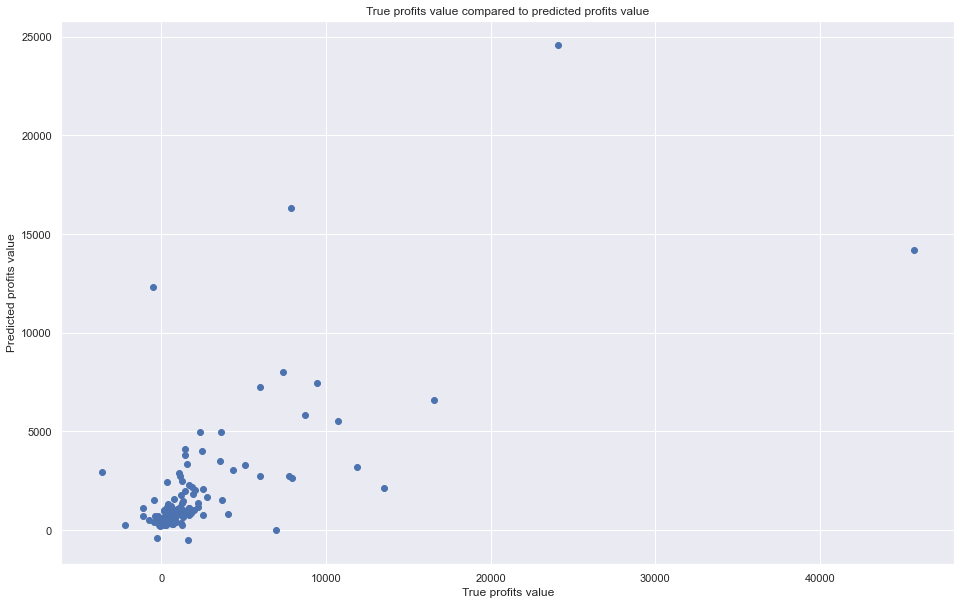

In [267]:
plt.scatter(y_test, predictions)
plt.title('True profits value compared to predicted profits value')
plt.xlabel('True profits value')
plt.ylabel('Predicted profits value')
plt.show()

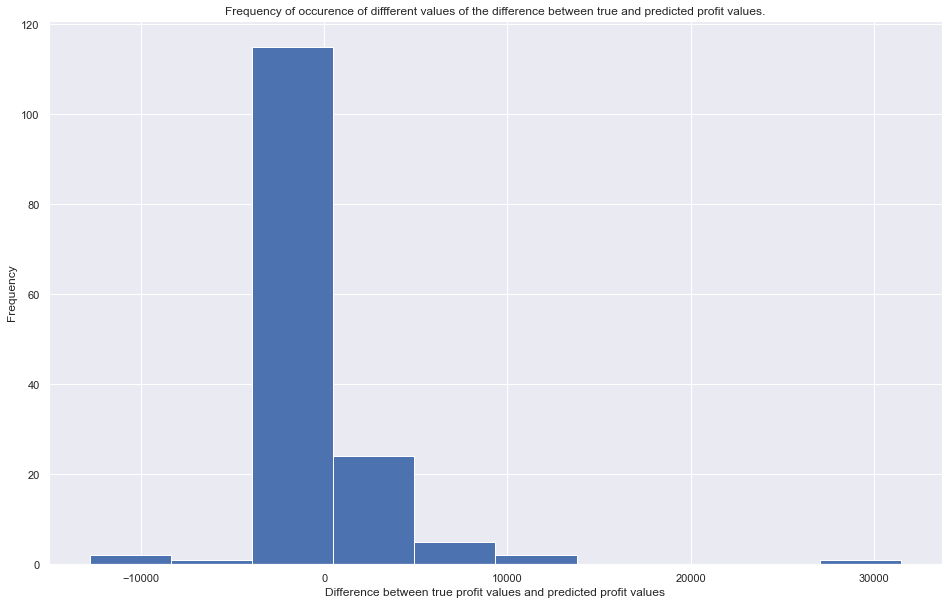

In [268]:
plt.hist(y_test - predictions)
plt.title('Frequency of occurence of diffferent values of the difference between true and predicted profit values.')
plt.xlabel('Difference between true profit values and predicted profit values')
plt.ylabel('Frequency')
plt.show()

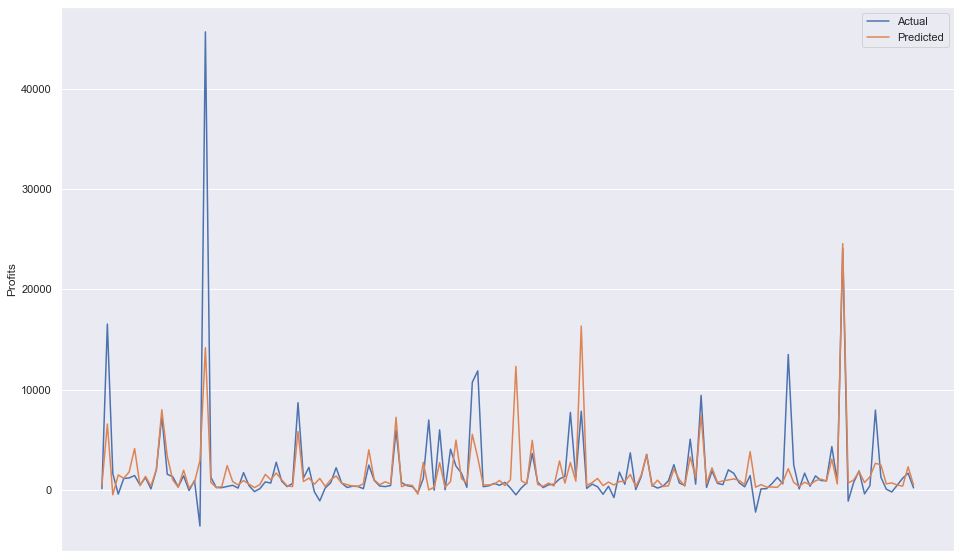

In [269]:
pred_df = pd.DataFrame(predictions)
x_df = pd.DataFrame(x_test.iloc[:,0])

plt.plot(range(len(y_test)), y_test)
plt.plot(range(len(predictions)), predictions)
plt.ylabel('Profits')
plt.legend(['Actual', 'Predicted'])
plt.xticks(())

plt.show()

From these graphs it can be seen that the predicted value is often close to the actual value, however there are some values which have less accurate predictions and usually a small number that have very inaccurate predictions.

Evaluate the model using either the mean absolute error (MAE) or the mean squared error (MSE).

MAE captures the average absolute difference between predictions and true values.

MSE encapsulates the variance.

MSE is differentiable, unlike MAE, however, MAE is less sensitive to outliers.

In [270]:
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
print('Mean absolute error = ',(mae))
print('###############################################')
print('Mean squared error = ',(mse))
print('###############################################')
r2_linreg = metrics.r2_score(y_test, predictions)
print('R2 score = ',(r2_linreg))
print('###############################################')

Mean absolute error =  1358.5135112556482
###############################################
Mean squared error =  12266589.642697483
###############################################
R2 score =  0.48337490563151286
###############################################


From these values it can be seen that the average difference between the predicted and true profit values was the value of mae which varied each time the code is run but it usually between the values of 1300 - 1550 (Million USD). The MSE however is usually very large indicating a large variance in results, this could be in part due to few predictions that were very wrong as MSE is highly sensitive to any outliers. The R2 score shows how much of the data fits the regression.

In [271]:
testing = x.drop(df.index[1:])
real = y.drop(df.index[1:])

In [272]:
print(testing)
print(int(real))

   employees  revenues  assets  totshequity  revchange  prftchange
0    2300000    485873  198825      77798.0        0.8        -7.2
13643


In [273]:
walmartpred = LinReg.predict(testing)

In [274]:
walmartpred

array([16321.36781824])

In [275]:
int(walmartpred) - int(real)

2678

### Lasso regression

Using the LassoCV method to find the optimum lambda value.

In [276]:
lasso_cv_model = LassoCV(alphas = np.random.randint(0,1000,100), cv = 10, max_iter = 100000).fit(x_train,y_train)

Find the alpha value of the Lasso model established with Cross-Validation.

In [277]:
lasso_cv_model.alpha_

412

Fit the Corrected Lasso model with this optimum alpha value. Then print the predicted values over the test set to y_pred_tuned.

In [278]:
lasso_tuned = Lasso().set_params(alpha = lasso_cv_model.alpha_).fit(x_train,y_train)

y_pred_tuned = lasso_tuned.predict(x_test)

print(y_pred_tuned)

[ 4.65559008e+02  6.56698312e+03 -4.40576378e+02  1.49958761e+03
  1.14804732e+03  1.79025844e+03  4.11503654e+03  4.20234656e+02
  1.35117924e+03  3.92796319e+02  2.01318678e+03  7.99334923e+03
  3.35168580e+03  1.00501960e+03  2.70597737e+02  1.96411248e+03
  1.81056044e+02  7.55820200e+02  2.95539606e+03  1.41858044e+04
  7.49613211e+02  2.58483913e+02  3.26462881e+02  2.42178366e+03
  8.34830235e+02  4.93308562e+02  9.19476846e+02  5.75187816e+02
  2.40728863e+02  5.16333389e+02  1.53246132e+03  1.01361264e+03
  1.68969222e+03  1.00727635e+03  3.99562070e+02  3.36973847e+02
  5.82503094e+03  8.28140402e+02  1.17871148e+03  5.69531515e+02
  1.14625823e+03  3.46264122e+02  9.99461135e+02  1.38345090e+03
  6.84435878e+02  4.94821498e+02  3.77527720e+02  3.61765257e+02
  5.93749465e+02  3.99058259e+03  9.97447722e+02  5.17790726e+02
  7.67737540e+02  6.00323830e+02  7.24233187e+03  3.30161979e+02
  5.21396994e+02  4.37031752e+02 -4.24142253e+02  2.74068133e+03
 -5.68251885e+00  2.69865

Print the correlation values as a dataframe.

In [279]:
# large coefficients indicate that the particular variable impacts the prediction signifcantly

pd.DataFrame(lasso_tuned.coef_, x.columns, columns = ['Coefficient'])


,Coefficient
employees,-0.000689
revenues,0.025866
assets,0.001730
totshequity,0.063015
revchange,5.778685
prftchange,0.158495


Calculate MAE, MSE and R2 scores.

In [280]:
lasso_MSE = metrics.mean_squared_error(y_test,y_pred_tuned)
lasso_MAE = metrics.mean_absolute_error(y_test, y_pred_tuned)
r2_lasso = metrics.r2_score(y_test, y_pred_tuned)

print('Mean absolute error = ',(lasso_MAE))
print('###############################################')
print('Mean squared error = ',(lasso_MSE))
print('###############################################')
print('R2 score = ',(r2_lasso))
print('###############################################')

Mean absolute error =  1357.357997981189
###############################################
Mean squared error =  12264230.77818813
###############################################
R2 score =  0.48347425260856547
###############################################


Calculate difference between MAE, MSE and R2 scores for multiple linear regression and lasso regression.

In [281]:
mae_diff = mae - lasso_MAE
mse_diff = mse - lasso_MSE
r2_diff = r2_linreg - r2_lasso

print('Mean absolute error difference = ',(mae_diff))
print('###############################################')
print('Mean squared error difference = ',(mse_diff))
print('###############################################')
print('R2 score difference = ',(r2_diff))
print('###############################################')

Mean absolute error difference =  1.1555132744590537
###############################################
Mean squared error difference =  2358.864509353414
###############################################
R2 score difference =  -9.934697705260565e-05
###############################################


In [282]:
walmartpred_lasso = lasso_tuned.predict(testing)

In [283]:
int(walmartpred_lasso) - int(real)

2687